In [1]:
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# national robbery 2012-2022

national_url = 'https://api.usa.gov/crime/fbi/cde/nibrs/national/robbery?from=1-2012&type=Counts&to=12-2022&API_KEY=6pQ1XOFvDCRG0DpNsdgIhcyiCmfUafzMzPETHn3K'

response = requests.get(national_url)
if response.status_code == 200:
    national = response.json()
else:
    print(f"Error: {response.status_code}")

In [3]:
national.get('victim').get('location')

{'victim': {'age': {'0-9': 6818,
   '10-19': 160410,
   '20-29': 354698,
   '30-39': 234768,
   '40-49': 157054,
   '50-59': 124766,
   '60-69': 62371,
   '70-79': 18980,
   '80-89': 5864,
   'Unknown': 8082,
   '90-Older': 972},
  'sex': {'Male': 735628,
   'Female': 395723,
   'Unknown': 3432,
   'Not Specified': 199070},
  'race': {'Asian': 40950,
   'White': 670286,
   'Unknown': 42670,
   'Multiple': 0,
   'Not Specified': 199070,
   'Black or African American': 366800,
   'American Indian or Alaska Native': 9407,
   'Native Hawaiian or Other Pacific Islander': 4670,
   'Asian, Native Hawaiian, or Other Pacific Islander': 0},
  'location': {'Rest Area': 732,
   'Cyberspace': 0,
   'Restaurant': 57118,
   'Field/Woods': 8640,
   'Liquor Store': 8745,
   'Tribal Lands': 65,
   'Bar/Nightclub': 9578,
   'Farm Facility': 97,
   'Not Specified': 0,
   'Other/Unknown': 43827,
   'Shopping Mall': 6451,
   'Amusement Park': 290,
   'Residence/Home': 248894,
   'School/College': 1265,
   '

In [ ]:
# Maya - work on most robbed locations by state

# california robbery 2012-2022

cali_url = 'https://api.usa.gov/crime/fbi/cde/nibrs/state/CA/robbery?from=1-2012&to=12-2022&API_KEY=6pQ1XOFvDCRG0DpNsdgIhcyiCmfUafzMzPETHn3K'

In [44]:
# Indi - work on robbery rate vs law enforcement employees by year

# employees 2012-2022

employees_url  = 'https://api.usa.gov/crime/fbi/cde/pe?from=2012&to=2022&API_KEY=6pQ1XOFvDCRG0DpNsdgIhcyiCmfUafzMzPETHn3K'

response = requests.get(employees_url)
if response.status_code == 200:
    employees = response.json()
else:
    print(f"Error: {response.status_code}")

In [49]:
male = employees.get('actuals').get('Male Officers').values()
female = employees.get('actuals').get('Female Officers').values()

In [70]:
per = employees.get('rates').get('Officers per 1,000 People').values()

In [23]:
# national robbery 2012-2022 by year

base_url = 'https://api.usa.gov/crime/fbi/cde/nibrs/national/robbery?from={}&type=Counts&to={}&API_KEY=6pQ1XOFvDCRG0DpNsdgIhcyiCmfUafzMzPETHn3K'

rob_by_year = {}

for year in range(2012, 2023):
    url = base_url.format(f'1-{year}', f'12-{year}')
    response = requests.get(url)
    if response.status_code == 200:
        rob_by_year[year] = response.json()
    else:
        print(f"Error: {response.status_code}")


In [71]:
rob_per_year = []

for year in range(2012, 2023):
    rob_per_year.append(
        sum(rob_by_year.get(year).get('victim').get('sex').values()))

employees_df = pd.DataFrame([range(2012, 2023), rob_per_year, male, female, per]).T
employees_df.columns = ['Year', 'Robberies', 'Male_Officers', 'Female_Officers', 'Officers_per_1k']
employees_df.set_index('Year', inplace=True)
employees_df.to_csv('employees.csv')

In [81]:
employees_df = pd.read_csv('employees.csv')

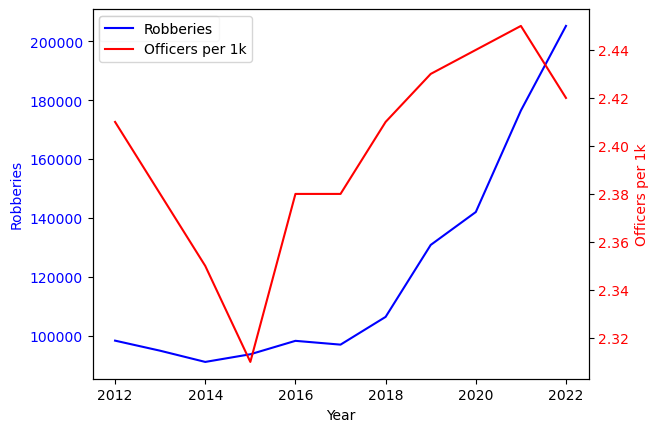

0.6648185233967915


In [87]:
fig, ax1 = plt.subplots()

# Plot the 'Robberies' on the left y-axis
sns.lineplot(data=employees_df, x='Year', y='Robberies',
             ax=ax1, label='Robberies', color='b')
ax1.set_ylabel('Robberies', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot the 'Officers_per_1k' on the right y-axis
sns.lineplot(data=employees_df, x='Year', y='Officers_per_1k',
             ax=ax2, label='Officers per 1k', color='r')
ax2.set_ylabel('Officers per 1k', color='r')
ax2.tick_params(axis='y', labelcolor='r')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()
print(employees_df.Robberies.corr(employees_df.Officers_per_1k))

In [6]:
# national robbery 2012-2022 by month

base_url = 'https://api.usa.gov/crime/fbi/cde/nibrs/national/robbery?from={}&type=Counts&to={}&API_KEY=6pQ1XOFvDCRG0DpNsdgIhcyiCmfUafzMzPETHn3K'

rob_month = {}

for year in range(2012, 2023):
    for month in range(1, 13):
        url = base_url.format(f'{month}-{year}', f'{month}-{year}')
        response = requests.get(url)
        if response.status_code == 200:
            rob_month[f'{month}-{year}'] = response.json()
        else:
            print(f"Error: {response.status_code}")

In [99]:
month_list = {}

for year in range(2012, 2023):
    for month in range(1, 13):
        month_list[f'{month}-{year}'] = (pd.Series(rob_month.get(
            f'{month}-{year}').get('offense').get('weapons')))

weapons_df = pd.DataFrame(month_list).T
weapons_df.to_csv('weapons.csv', index_label='Date')

In [70]:
weapons_df = pd.read_csv('weapons.csv')
weapons_df.Date = pd.to_datetime(weapons_df.Date, format='%m-%Y')
weapons_df.set_index('Date', inplace=True)

In [71]:
weapons_df.sum(axis=0).sort_values(ascending=False)

Handgun                            313211
Personal Weapons                   303741
None                                97963
Firearm                             81801
Knife/Cutting Instrument            80929
Other                               40826
Unknown                             34662
Blunt Object                        29678
Handgun (Automatic)                 18331
Rifle                                7848
Shotgun                              6709
Other Firearm                        6571
Motor Vehicle/Vessel                 5196
Firearm (Automatic)                  3832
Asphyxiation                         1004
Rifle (Automatic)                     741
Explosives                            591
Poison                                555
Other Firearm (Automatic)             293
Drugs/Narcotics/Sleeping Pills        281
Fire/Incendiary Device                275
Shotgun (Automatic)                    90
Drowning                                0
Unarmed                           

In [72]:
weapons_df['Firearm'] = weapons_df[['Firearm', 'Rifle', 'Handgun', 'Shotgun', 'Other Firearm']].sum(axis=1)
weapons_df.drop(['Rifle', 'Handgun', 'Shotgun', 'Other Firearm'], axis=1, inplace=True)

In [73]:
weapons_df['Firearm (Automatic)'] = weapons_df[['Rifle (Automatic)', 'Handgun (Automatic)', 'Shotgun (Automatic)', 'Firearm (Automatic)', 'Other Firearm (Automatic)']].sum(axis=1)
weapons_df.drop(['Rifle (Automatic)', 'Handgun (Automatic)', 'Shotgun (Automatic)', 'Other Firearm (Automatic)'], axis=1, inplace=True)

In [74]:
weapons_df['Unknown'] = weapons_df[['Unknown', 'None']].sum(axis=1)
weapons_df.drop(['None'], axis=1, inplace=True)

In [75]:
weapons_df.drop(['Pushed or Thrown Out Window', 'Unarmed', 'Drowning', 'Lethal Cutting Instrument', 'Club/Blackjack/Brass Knuckles',
                'Strangulation - Include Hanging', 'Drugs/Narcotics/Sleeping Pills', 'Fire/Incendiary Device', 'Poison'], axis=1, inplace=True)

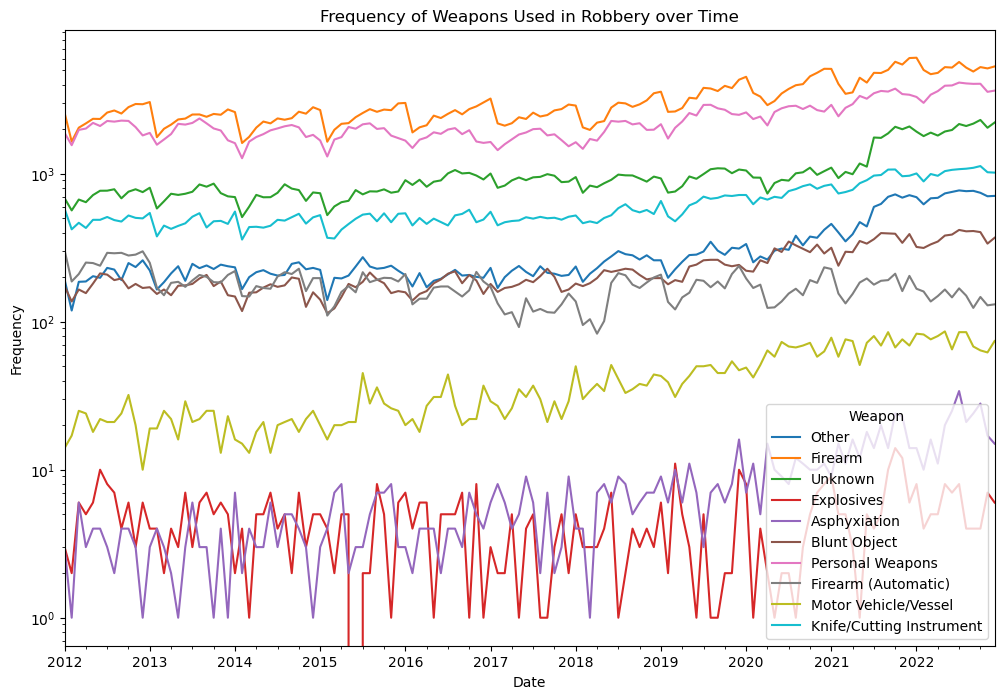

In [77]:
weapons_df.plot(kind='line', figsize=(12, 8))

plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Frequency of Weapons Used in Robbery over Time')
plt.legend(title='Weapon')
plt.yscale('log')

plt.show()